# PASCAL VOC Data visualization

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


In [4]:
# Load the VOC dataset
voc_ds, voc_ds_info = tfds.load('voc', split='validation', shuffle_files=True, with_info=True)

In [34]:
voc_ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'labels': Sequence(ClassLabel(shape=(), dtype=int64, num_classes=20)),
    'labels_no_difficult': Sequence(ClassLabel(shape=(), dtype=int64, num_classes=20)),
    'objects': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=float32),
        'is_difficult': bool,
        'is_truncated': bool,
        'label': ClassLabel(shape=(), dtype=int64, num_classes=20),
        'pose': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
})

## Displaying image with Bounding Box

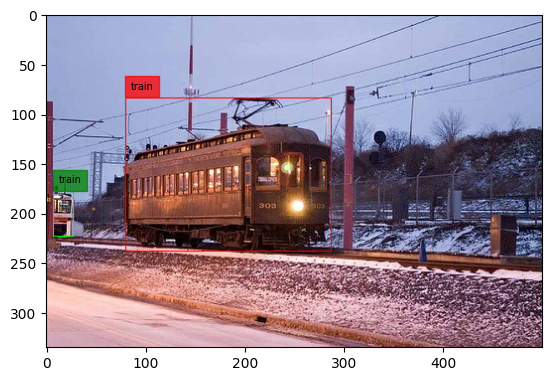

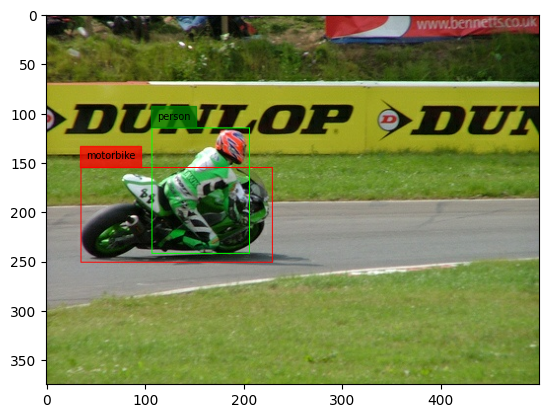

In [195]:
# class_names = array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
#        'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
#       dtype='<U11')
class_names = np.array(voc_ds_info.features['labels'].names)

# Input image and bounding boxes and tensors
# tensor of image.shape = (height, width, channels)
# tensor of boxes.shape = (number of bounding boxes, [y_min, x_min, y_max, x_max]])
#@param colors are (red, green, blue) in RBG format
def add_bounding_box_to_image(image, boxes,colors = np.array([[255., 0.0, 0.0], [0.0, 255.0, 0.0], [0.0, 0.0, 255.0]])):
    # [None, :] adds a batch dimension
    image_batched = image[None, :]

    boxes_batched  = boxes[None, :]

    bounded_image = tf.image.draw_bounding_boxes(image_batched.numpy(),boxes_batched.numpy(), colors)

    # Convert bounded_image from float to integer for matplotlib
    bounded_image = tf.cast(bounded_image, tf.uint8)

    # Remove batch dimension from bounded_image
    bounded_image = bounded_image[0]

    return bounded_image


def add_bounding_box_labels_to_matplotlib_axis(matplt_axis,image_height, image_width, box_labels, boxes,
                                      class_names,
                                      colors= np.array([[255., 0.0, 0.0], [0.0, 255.0, 0.0], [0.0, 0.0, 255.0]])):
    label_index = 0
    for box in boxes:
        # Get top left corner of bounding box
        top_left_y = box[0].numpy() * image_height # box[0] is y_min
        top_left_x = box[1].numpy() * image_width # box[1] is x_min

        # Get label for particular bounding box
        bbox_label_name_int = box_labels[label_index]

        # Convert label from int to string
        bbox_label_name_str = str(class_names[bbox_label_name_int])

        label_colors = ['red', 'green', 'blue']
        # Cycle through colors every third box
        label_color = label_colors[label_index % 3]

        # Add label to image with offset for alignment
        axis_text = matplt_axis.text(x= top_left_x + 4, y = top_left_y - 10,
                            s=bbox_label_name_str, fontsize=7, color='black')
        # Add background box to label text
        axis_text.set_bbox(dict(facecolor=label_color, alpha = 0.75, edgecolor=label_color))

        label_index += 1

    return




'''
    Main loop
'''

counter = 0 # For debugging
for item in voc_ds:

    image_with_bboxes = add_bounding_box_to_image(item['image'], item['objects']['bbox'])

    fig, ax = plt.subplots()

    # voc tfds box format = [y_min, x_min, y_max, x_max] scaled from 0 to 1 based on image size
    # boxes.shape = (number of bounding boxes, [y_min, x_min, y_max, x_max]])
    boxes  = item['objects']['bbox']
    # shape = (number of bounding boxes,), each label is an integer
    bbox_labels = item['objects']['label'] 

    image_width = item['image'].shape[1]
    image_height = item['image'].shape[0]

    add_bounding_box_labels_to_matplotlib_axis( ax, image_height,
                                      image_width,bbox_labels,
                                      boxes, class_names)

    plt.imshow(image_with_bboxes.numpy())
    plt.show()

    counter += 1

    if counter == 2:
        break
                             

Get average shape of images to determine what size to preprocess images to

In [158]:
counter = 0
x_total = 0
y_total = 0

for item in voc_ds:
    shape = item['image'].shape
    # print(shape)

    counter += 1

    # get average shape for every image item in for loop
    x_total += item['image'].shape[0]
    y_total += item['image'].shape[1]

    x_avg = x_total / counter
    y_avg = y_total / counter

    if counter == 50:
        print(f'x_avg: {x_avg}, y_avg: {y_avg}')
        break


x_avg: 385.6, y_avg: 476.18


#### Get specific data (bounding boxes and specific classes) from PASCAL Voc dataset instances

In [ ]:
# class_names = array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
#        'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
#       dtype='<U11')

# count number of instances that are in potterplant class

potted_plate_count = 0


for item in voc_ds:
    shape = item['image'].shape
    # print(shape)

    counter += 1

    # get average shape for every image item in for loop
    x_total += item['image'].shape[0]
    y_total += item['image'].shape[1]

    x_avg = x_total / counter
    y_avg = y_total / counter

    if counter == 50:
        print(f'x_avg: {x_avg}, y_avg: {y_avg}')
        break

# Create Pipeline for 